# Data Augmentation Analysis

In [3]:
import warnings
from srl_nlp.logger_config import silence_logger
warnings.filterwarnings('ignore')
silence_logger()

from docs.notebooks.fn_graphs  import *
from docs.notebooks.doc_graphs import *
from srl_nlp.data_augmentation.scripts.resource_augmentation import StandardAugmentation

from IPython.display import HTML

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


HTML('''<script>
code_show=false; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code"></form>''')


## Framenet 1.5 before augmentation

In [2]:
_version = '1.5'
fn = get_fn(fn_version=_version, fn_root_path='../srl_nlp/framenet')

### FrameNet examples

There are Frame elements whose name appear in multiple frames, as we can see:

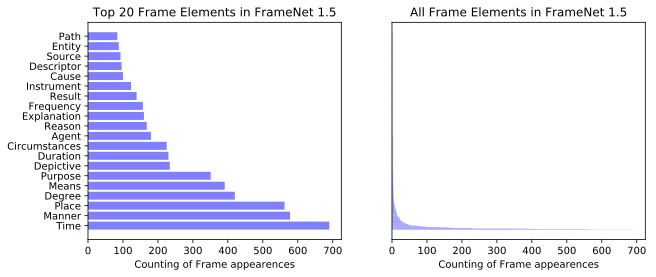

In [3]:
hist_frame_by_fe(top=20, fn_version=_version, fn = fn)

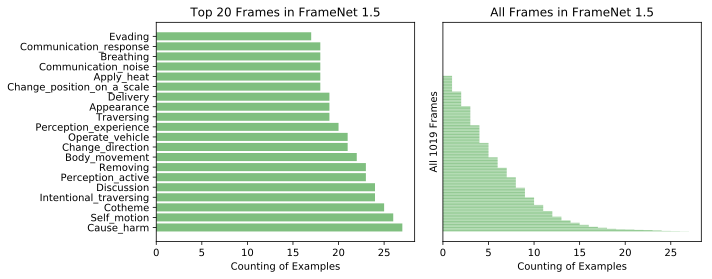

In [4]:
hist_ex_by_frame(top = 20, fn_version=_version, fn = fn)

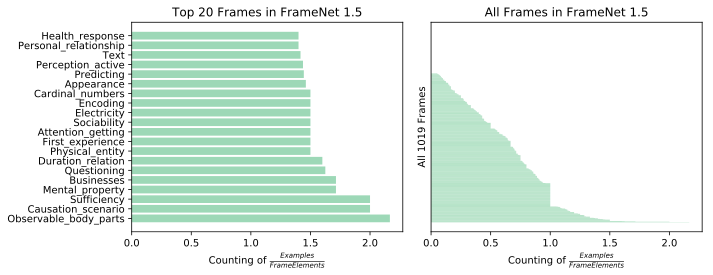

In [5]:
hist_ex_by_fe_by_frame(top = 20, fn_version=_version, fn = fn)

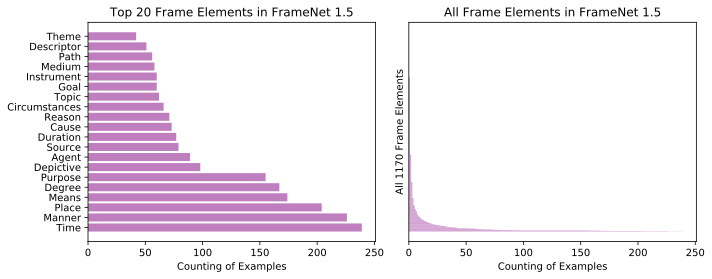

In [6]:
hist_ex_by_fe(top = 20, fn_version=_version, fn = fn)

### Current Documents
There are 78 documents in total, they are split in test, dev and train

In [7]:
DEFAULT_DOCS_ROOT_PATH = '/Users/brenow/DataSets/framenet_docs/paper'

adapter = FNXMLAdapter()
train_docs = get_docs(adapter=adapter, file_folder_path=path.join(DEFAULT_DOCS_ROOT_PATH, 'train'))
dev_docs = get_docs(adapter=adapter, file_folder_path=path.join(DEFAULT_DOCS_ROOT_PATH, 'dev'))
test_docs = get_docs(adapter=adapter, file_folder_path=path.join(DEFAULT_DOCS_ROOT_PATH, 'test'))
docs = train_docs + dev_docs + test_docs

#docs = get_docs(adapter=adapter, file_folder_path=path.join(DEFAULT_DOCS_ROOT_PATH, 'train', 'ANC__110CYL068.xml'))

examples = DocExamplesMap(docs, False)

In [8]:
diff_fn_ex = fn.frame_names.difference(examples.frame_names)
print("There are {} frames in the FrameNet that are not represented in the documents".format(len(diff_fn_ex)))
diff_ex_fn = examples.frame_names.difference(fn.frame_names)
print("There are {} frames in the documents not present in the framenet".format(len(diff_ex_fn)))

if len(diff_ex_fn) > 0:
    print("They are: {}".format(", ".join(diff_ex_fn)))

There are 908 frames in the FrameNet that are not represented in the documents
There are 0 frames in the documents not present in the framenet


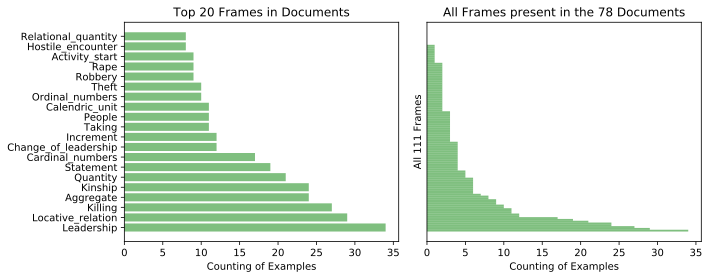

In [9]:
hist_ex_by_frame_docs(top=20, ex_map=examples)

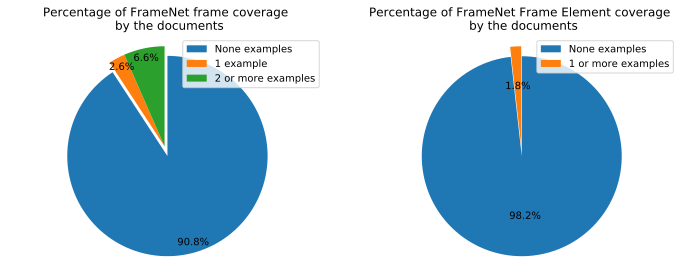

In [10]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
ex_count, labels = pie_frame_coverage_examples(ex_map=examples, fn=fn,
                                               threshold = [1,2],
                                               labels = ['None examples', '1 example', '2 or more examples'],
                                               show=False)

plt.subplot(1, 2, 2)
ex_count, labels = pie_fe_coverage_examples(ex_map=examples, fn=fn,
                                            threshold = [1],
                                            labels = ['None examples', '1 or more examples'],
                                            show = False)

plt.tight_layout()
plt.show()

## FrameNet 1.5 after Simple Augmentation

### FrameNet examples

In [11]:
_version = '1.5'
augmentation = StandardAugmentation()
fn_augmented, docs_augmented = augmentation.augment(fn=fn, docs = docs)

There are Frame elements whose name appear in multiple frames, as we can see:

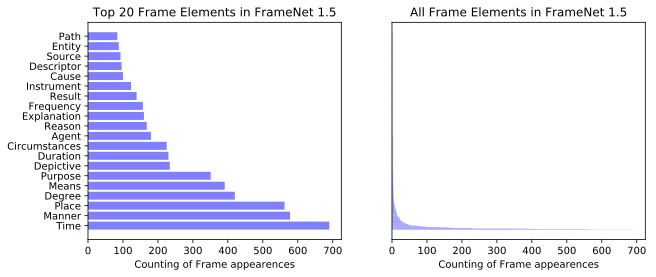

In [12]:
hist_frame_by_fe(top=20, fn_version=_version, fn = fn_augmented)

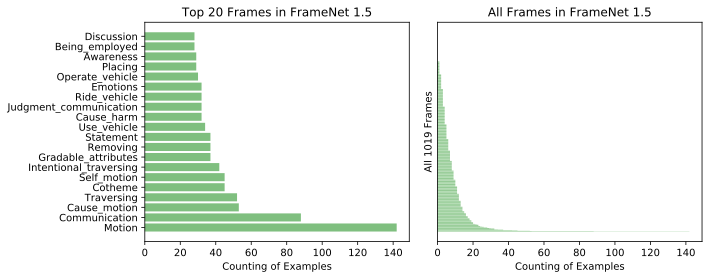

In [13]:
hist_ex_by_frame(top = 20, fn_version=_version, fn = fn_augmented)

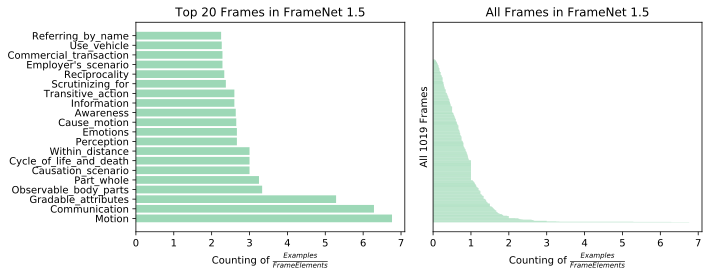

In [14]:
hist_ex_by_fe_by_frame(top = 20, fn_version=_version, fn = fn_augmented)

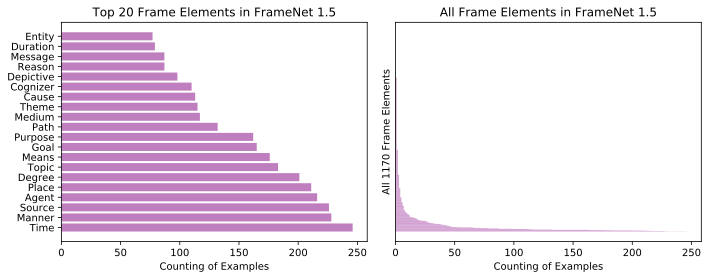

In [15]:
hist_ex_by_fe(top = 20, fn_version=_version, fn = fn_augmented)

### Documents after augmentation
There are the same 78 documents in total, they are split in test, dev and train.
We just add more annotations to them

In [16]:
DEFAULT_DOCS_ROOT_PATH = '/Users/brenow/DataSets/framenet_docs/paper'

adapter = FNXMLAdapter()

examples_augmented = DocExamplesMap(docs_augmented, False)

In [17]:
diff_fn_ex = fn.frame_names.difference(examples_augmented.frame_names)
print("There are {} frames in the FrameNet that are not represented in the documents".format(len(diff_fn_ex)))
diff_ex_fn = examples_augmented.frame_names.difference(fn_augmented.frame_names)
print("There are {} frames in the documents not present in the framenet".format(len(diff_ex_fn)))

if len(diff_ex_fn) > 0:
    print("They are: {}".format(", ".join(diff_ex_fn)))

There are 854 frames in the FrameNet that are not represented in the documents
There are 0 frames in the documents not present in the framenet


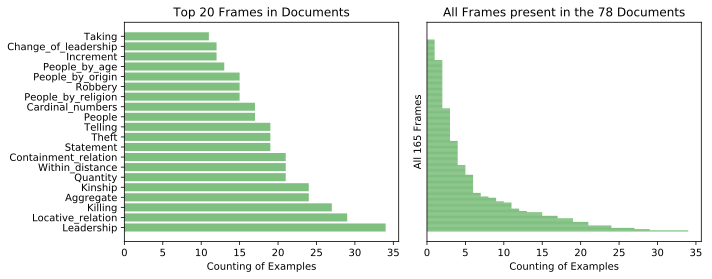

In [18]:
hist_ex_by_frame_docs(top=20, ex_map=examples_augmented)

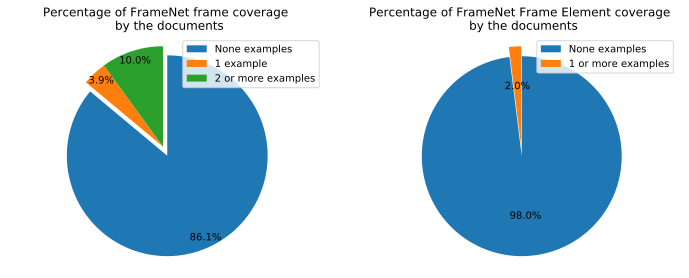

In [19]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
ex_count, labels = pie_frame_coverage_examples(ex_map=examples_augmented, fn=fn,
                                               threshold=[1, 2],
                                               labels=['None examples', '1 example', '2 or more examples'],
                                               show=False)

plt.subplot(1, 2, 2)
ex_count, labels = pie_fe_coverage_examples(ex_map=examples_augmented, fn=fn,
                                            threshold=[1],
                                            labels=['None examples', '1 or more examples'],
                                            show=False)

plt.tight_layout()
plt.show()

## Overal comparioson
Here I compare the results of the augmentations side by side

## Model Comparison
Here I show the results of the models in the different augmentations

# Model Analysis
Here I compare the models on the tasks